## **Ecommerce Dataset**

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### **Features in E-Commerce Datasets**

1. **Avg. Session Length**: The average duration of a session on the website.
2. **Time on App**: The average time a user spends on the mobile app.
3. **Time on Website**: The average time a user spends on the website.
4. **Length of Membership**: The duration of the user's membership.
5. **Yearly Amount Spent**: The total amount spent by the user in a year.



In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
commerce_df = pd.read_csv("Ecommerce_Customers")

# display first few rows of of the dataset
commerce_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# check data info
commerce_info = commerce_df.info()
print(commerce_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [5]:
# check total null values
commerce_df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

*There are no missing values in the dataset.  
A favourable condition for the dataset*

In [6]:
#display summary statistics

summary_stats = commerce_df.describe()
print('summary statistics: \n')
summary_stats

summary statistics: 



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### EDA & Visualizations  
1. Data Distributions
2. Outlier visualization
3. Heatmap

#### 1. Data Distributions

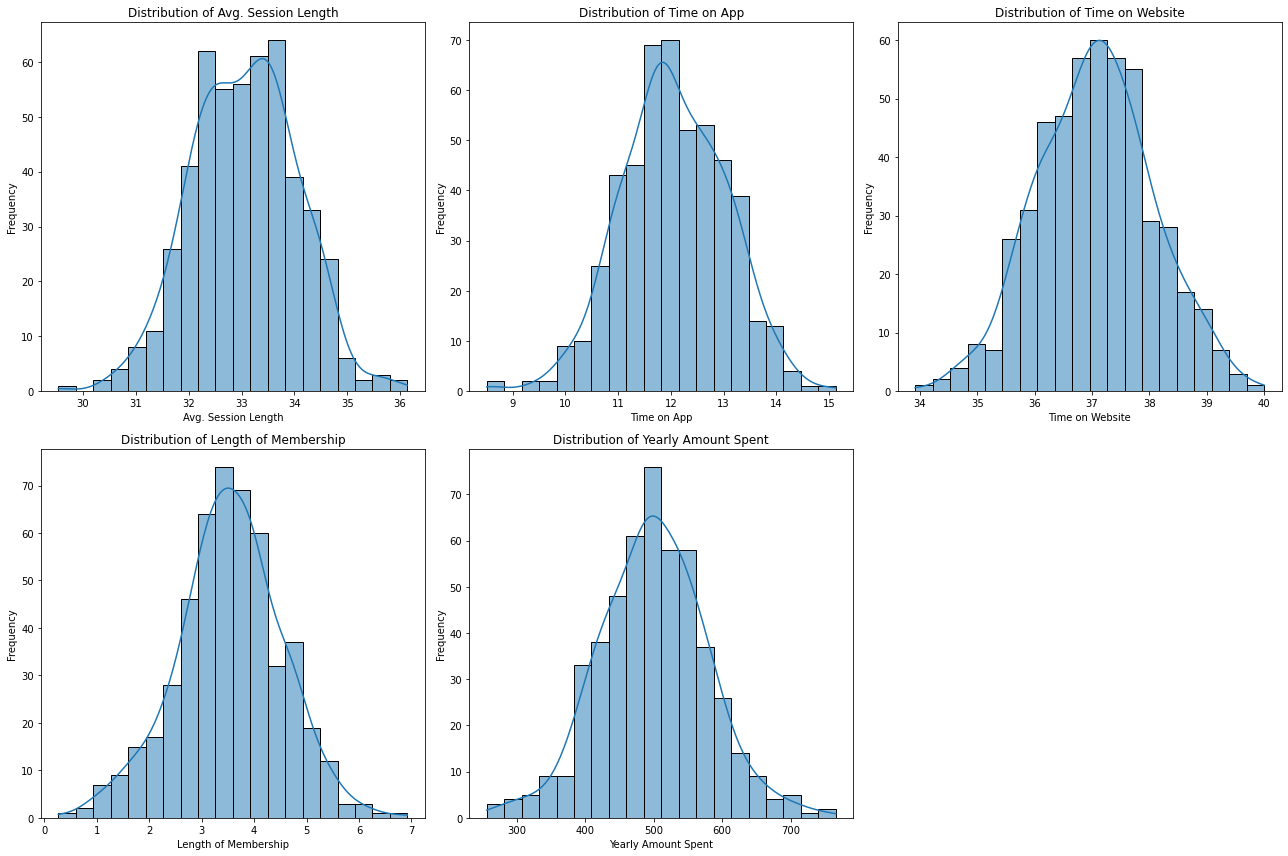

In [7]:
# histogram for data distribution
columns_to_plot = ['Avg. Session Length', 'Time on App', 'Time on Website',	'Length of Membership','Yearly Amount Spent']

# create figure
plt.figure(figsize=(18,12))

# iterate through columns to plot and create subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(commerce_df[column], kde=True, bins=20)
    # set title
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

***The above disribution shows that the dataset is close to being normally distributed, if not normally distibuted***

#### 2. Outlier Detection

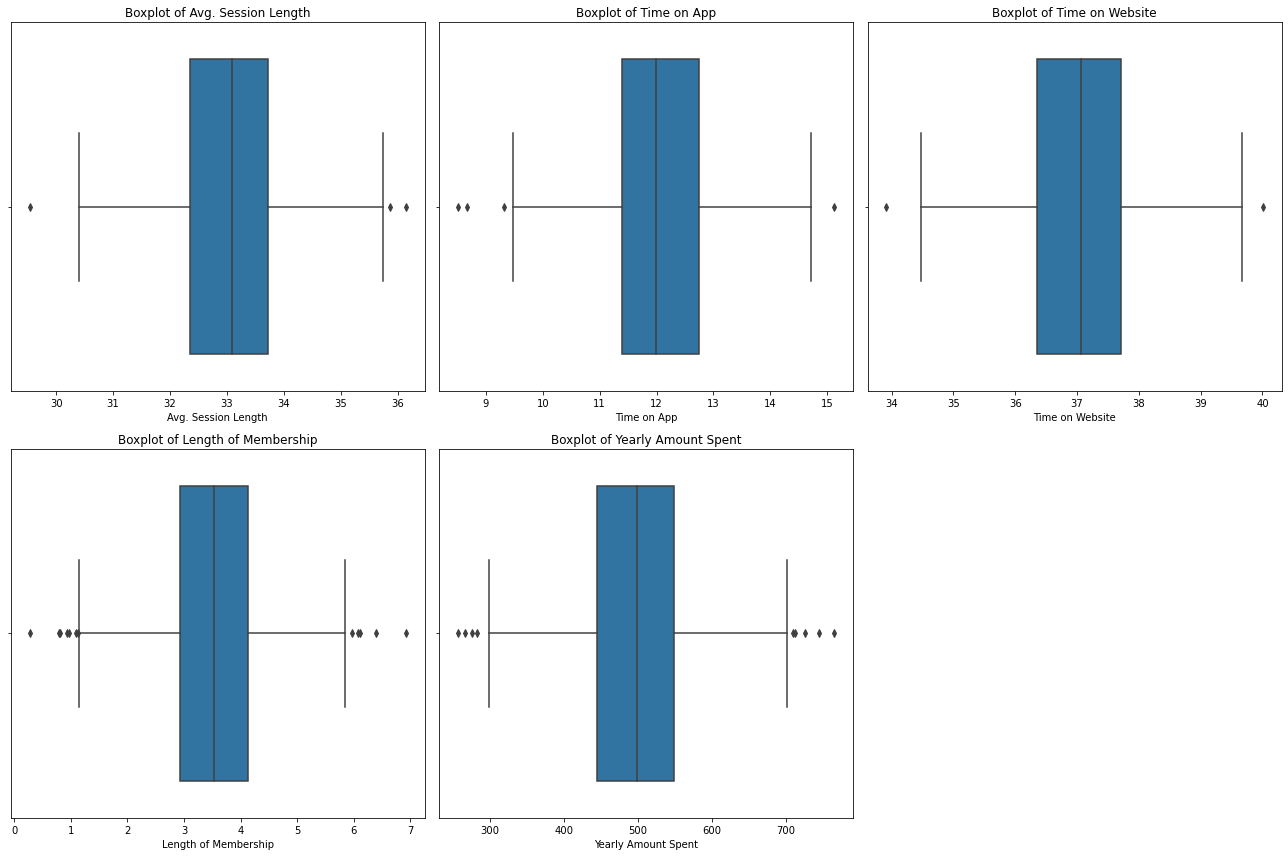

In [8]:
# columns for boxplot
columns_to_plot = ['Avg. Session Length', 'Time on App', 'Time on Website',	'Length of Membership','Yearly Amount Spent']

# create figure
plt.figure(figsize=(18,12))

# iterate through columns to plot and create subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(commerce_df[column])
    # set title
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

***The bocplot shos that there are outliers in the dataset. Removal of outliers shall be done later in the notebook***

#### 3. Correlations

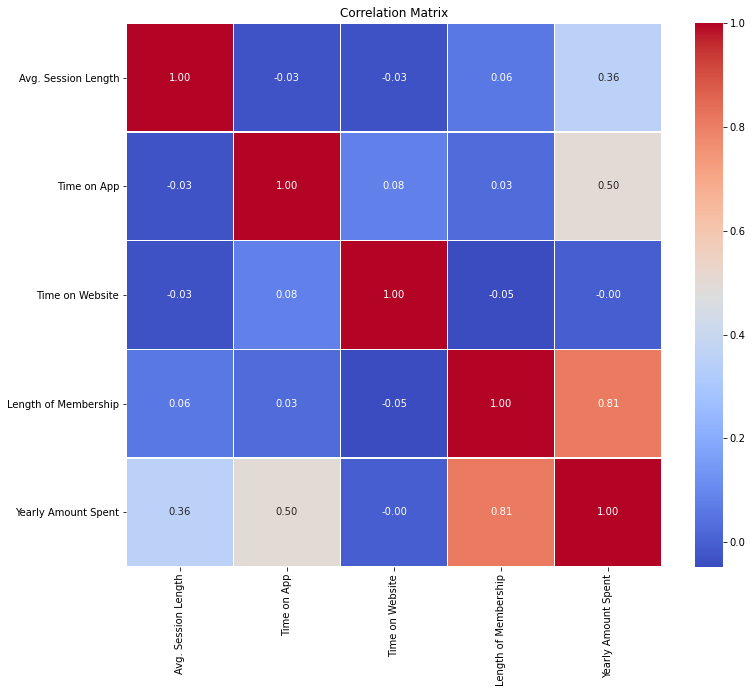

In [18]:
# heatmap of dataset
plt.figure(figsize=(12,10))
sns.heatmap(commerce_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- *correlation matrix shows two features that are highly correlated*  
- *length of membership vs yearly Amount Spent*
- *The strong Postive correlation suggests that long memberships are associated with highe annual spending*

* Scatter Plot  
**Length of Memebership Vs Yearly Amount Spent**

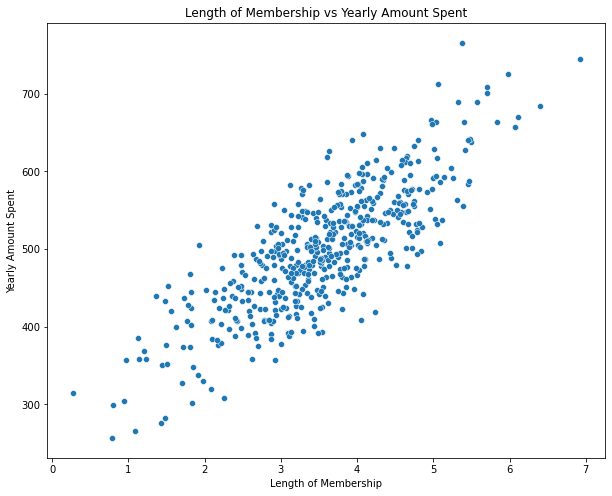

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=commerce_df)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()


### Data Cleaning  
* Outlier Removal

In [11]:
# define function to remove all outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # intewrquartile range
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upepr_bound = Q3 + 1.5 * IQR

        # keep the dataframe that lies within the lower and upper bound
        df = df[(df[col] >= lower_bound) & (df[col] <= upepr_bound)]
    return df
        

In [12]:
# columns to remove outliers
columns_to_check = ['Avg. Session Length', 'Time on App', 'Time on Website',	'Length of Membership','Yearly Amount Spent']

# remove the outliers
commerce_df_clean = remove_outliers(commerce_df, columns_to_check)

# display difference in data shapes
print("original data shape: ", commerce_df.shape)
print("cleaned data shape: ", commerce_df_clean.shape)

original data shape:  (500, 8)
cleaned data shape:  (474, 8)


In [13]:
# save cleaned data to csv
save_path = "~/Desktop/blossom/exercises_-_projects/projects/data/Ecommerce_Cleaned_data.csv"
commerce_df_clean.to_csv(save_path, index=False)


## Prediction With Regression Models

In this section, we explore regression models for predicting **yearly amount spent**.  
Models to be considered are:  
- linear regression
- Decision Tree Regressor
- Random Forest Regressor

In [14]:
# base class for common functionality
class EcommercePrediction:
    def __init__(self, save_path):
        self.save_path = save_path
        self.data = None
        self.x = None
        self.y = None
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None
        self.predictions = None
        self.model = None


    # load data
    def load_data(self):
        self.data = pd.read_csv(self.save_path)
    
    # define features and target
    def preprocess_data(self):
        self.x = self.data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
        self.y = self.data['Yearly Amount Spent']
    
    # split data into train and test
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=42)
    
    # evaluate model
    def evaluate_model(self):
        # make predictions
        self.predictions = self.model.predict(self.x_test)

        # evaluation metrics
        mse = mean_squared_error(self.y_test, self.predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, self.predictions)
        print(f'Model RMSE: {rmse}')
        print(f'Model R^2s score: {r2}')
        return rmse, r2
    

    # save the model
    def save_model(self, model_path):
        joblib.dump(self.model, model_path)


    # load the model
    def load_model(self, model_path):
        self.model = joblib.load(model_path)







# linear regression
class LinearRegressionModel(EcommercePrediction):
    def train_model(self):
        self.model = LinearRegression()
        self.model.fit(self.x_train, self.y_train)

# decision tree regressor
class DecisionTreeModel(EcommercePrediction):
    def train_model(self):
        self.model = DecisionTreeRegressor(random_state = 42)
        self.model.fit(self.x_train, self.y_train)

# random forest model
class RandomForestModel(EcommercePrediction):
    def train_model(self):
        self.model = RandomForestRegressor(n_estimators=300, max_depth=7, random_state=42)
        self.model.fit(self.x_train, self.y_train)


        

Model RMSE: 9.61829972381641
Model R^2s score: 0.9785595417268144


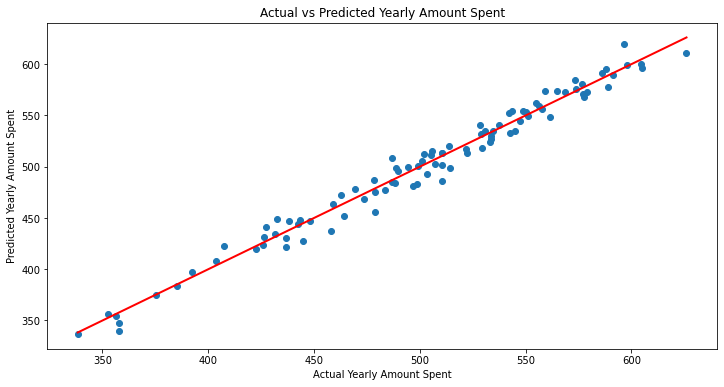

In [15]:
# usage for linear regression
lr_model = LinearRegressionModel(save_path)
lr_model.load_data()
lr_model.preprocess_data()
lr_model.split_data()
lr_model.train_model()
lr_rmse, lr_r2 = lr_model.evaluate_model()
lr_model.save_model('Linear_Regression_model.pkl')

# plot the results
y_pred = lr_model.predictions 
plt.figure(figsize=(12, 6))
plt.scatter(lr_model.y_test, y_pred)
plt.plot([min(lr_model.y_test), max(lr_model.y_test)], [min(lr_model.y_test), max(lr_model.y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.show()

In [16]:
# usage for decision tree regressor
dt_model = DecisionTreeModel(save_path)
dt_model.load_data()
dt_model.preprocess_data()
dt_model.split_data()
dt_model.train_model()
dt_rmse, dt_r2 = dt_model.evaluate_model()
dt_model.save_model('decision_tree_model.pkl')

Model RMSE: 23.623083427627616
Model R^2s score: 0.8706666226900794


In [17]:
# usage for random forest regessor
rf_model = RandomForestModel(save_path)
rf_model.load_data()
rf_model.preprocess_data()
rf_model.split_data()
rf_model.train_model()
rf_rmse, rf_r2 = rf_model.evaluate_model()
rf_model.save_model('random_forest_model.pkl')

Model RMSE: 16.02282348579265
Model R^2s score: 0.9405001942618438


***Comparing the evaluations of the three models considered, the linear regression is the best performing model with an $R2$ score of $0.97$ and MSE of $9.62$. This is a very strong model performanace***